In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab
import seaborn as sns
import re
import nltk
plt.style.use('fivethirtyeight')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [4]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--","#NAME?","NULL","NA","#N/A"]
raw_data = pd.read_csv("Training-Data-sets - NEWDATA.csv")

In [5]:
raw_data.tail(5)

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
11995,11996,2590.892697,25770808,97737,2185034,5998,147474,176056,86438176,1616130,...,74.08,19.09,104.12,33.95,45.16,78.51,8272828,457864,0.3466,45.62
11996,11997,156.792378,37456881,63451,12303996,186513,248001,112522,721308843,1767765,...,49.05,36.98,110.44,32.43,43.95,78.55,4472051,458844,0.2238,38.29
11997,11998,208.095996,24982441,121518,8765824,61403,110445,144528,676086883,3122744,...,22.32,32.32,109.93,40.51,48.42,74.72,1575934,563762,0.0703,44.99
11998,11999,214.557394,35213911,47191,12857291,135013,275713,56677,117846954,2635366,...,73.26,32.73,105.35,42.94,44.48,63.15,9391109,582726,0.0599,32.88
11999,12000,71.037805,37143495,14601,7249412,345794,212884,18429,360803137,1333291,...,76.07,40.88,116.12,35.92,44.83,71.42,11713937,312761,0.1015,43.36


## Converting the data into 429 equal period to sync in with Test data

In [6]:
raw_data['decile'] = pd.qcut(raw_data['Day'], 429, labels=False)

In [7]:
train_data = raw_data.groupby(raw_data['decile'],as_index = False)['EQ', 'Social_Search_Impressions', 'Social_Search_Working_cost',
        'Digital_Impressions', 'Digital_Working_cost',
        'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50',
        'OOH_Impressions', 'OOH_Working_Cost', 'SOS_pct',
        'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Median_Rainfall',
        'Fuel_Price', 'Inflation', 'Trade_Invest', 'Brand_Equity',
        'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
        'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
        'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
        'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
        'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
        'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
        'RPI_Subcategory'].mean()

In [8]:
train_data.tail(4)

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
425,601.853906,1.930520e+07,67957.464286,6.402126e+06,206699.392857,173221.642857,86259.964286,4.810595e+08,1.930008e+06,19.571429,...,51.487857,29.872500,106.110357,38.859286,46.086071,68.653571,6.700477e+06,576062.107143,0.216750,38.863929
426,474.558013,1.963702e+07,62683.142857,6.221107e+06,215927.714286,189745.214286,107195.357143,4.424750e+08,1.685021e+06,24.964286,...,45.556786,26.106071,107.341429,38.613571,46.466429,71.186786,6.463998e+06,521819.785714,0.191511,41.154643
427,476.039708,1.964499e+07,54443.678571,6.246626e+06,234465.821429,193963.678571,90640.178571,4.712279e+08,2.187270e+06,25.607143,...,40.460714,28.391071,106.496071,38.313214,46.373214,69.537143,6.681125e+06,577864.535714,0.230471,38.984643
428,466.351720,2.219888e+07,66185.428571,6.418790e+06,213342.000000,213725.607143,83239.035714,4.789062e+08,1.917576e+06,26.107143,...,49.671429,29.572857,107.359643,37.731429,46.513571,70.475714,6.404870e+06,544923.714286,0.183439,40.286071


Time Series on train_data

In [9]:
# extract out the time-series
sales_ts = train_data['EQ']
sales_ts.index=train_data.index

In [11]:
sales_ts.tail()

424    441.263062
425    601.853906
426    474.558013
427    476.039708
428    466.351720
Name: EQ, dtype: float64

Text(0, 0.5, 'Sales')

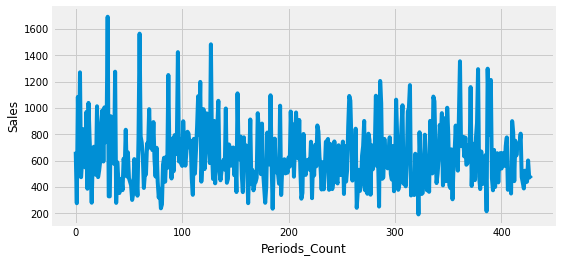

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Periods_Count')
plt.ylabel('Sales')

There seems to be a distinct seansonality when looked at monthly data since 1983
However since 2015 data alone, we see a sharp decline

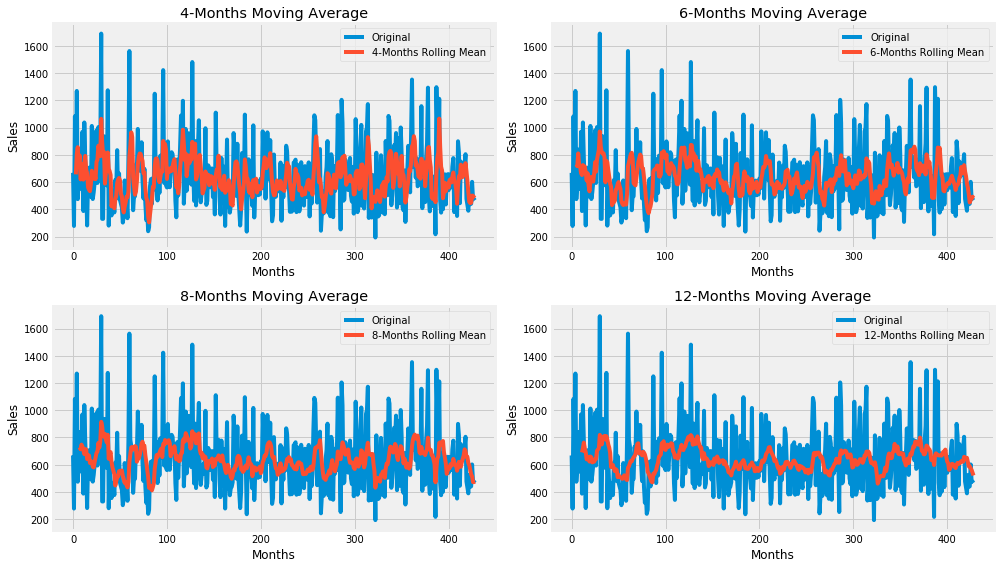

In [13]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Months")
axes[0][0].set_ylabel("Sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Months")
axes[0][1].set_ylabel("Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Months")
axes[1][0].set_ylabel("Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Months")
axes[1][1].set_ylabel("Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

Four months rolling average looks better than the high period rolling averages, suggesting immediate past is probably more important

In [15]:
#Time Series Decomposition
from   sklearn.metrics           import  mean_squared_error
from   statsmodels.tsa.stattools import  adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf


decomposition = sm.tsa.seasonal_decompose(sales_ts, model='additive', freq=13)

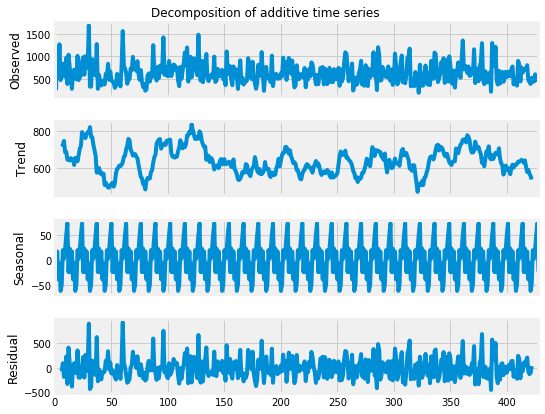

In [16]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of additive time series')
plt.show()

We see a seasonality. There is a downward trend from period 475 which is around 2015 (late 2015).

In [88]:
dftest = adfuller(sales_ts)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -19.173
DF test p-value is 0.0000


The time series is stationary i.e. we see a relatively stable mean and standard deviation as corroborated by the df test above. P-val is less than critical implying stationarity.

A forecasting model is being attempted below using SARMAX framework

In [97]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 13) for x in list(itertools.product(p, d, q))]

In [102]:
#Separate data into train and test
train = sales_ts[sales_ts.index < 350]
test = sales_ts[sales_ts.index >= 350]

In [27]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [125]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}13 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1)x(0, 1, 1, 13)13 model - AIC:4678.4003831511745


### Inference

* The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

For ARIMA(p, d, q) × (P, D, Q)S,
we got SARIMAX(0, 1, 1)x(0, 1, 1, 13)13 model with the least AIC:4678

Here, 
* p = non-seasonal AR order = 0,
* d = non-seasonal differencing = 1,
* q = non-seasonal MA order = 1,
* P = seasonal AR order = 0,
* D = seasonal differencing = 1,
* Q = seasonal MA order = 1,
* S = time span of repeating seasonal pattern = 13

In [106]:
best_model = sm.tsa.statespace.SARIMAX(train,
                                      order=(0, 1, 1),
                                      seasonal_order=(0, 1, 1, 13),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [107]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                 EQ   No. Observations:                  350
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 13)   Log Likelihood               -2336.200
Date:                            Mon, 30 Mar 2020   AIC                           4678.400
Time:                                    00:04:54   BIC                           4689.852
Sample:                                         0   HQIC                          4682.965
                                            - 350                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9999      3.456     -0.289      0.772      -7.773       5.773
ma.S.L13      -0.9181      0.051   

In [117]:
#Prediction for the period 2018
y_hat=best_results.predict(start=351, end=428)

In [119]:
# Compute the root mean square error
mse = ((test - y_hat) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 235.493


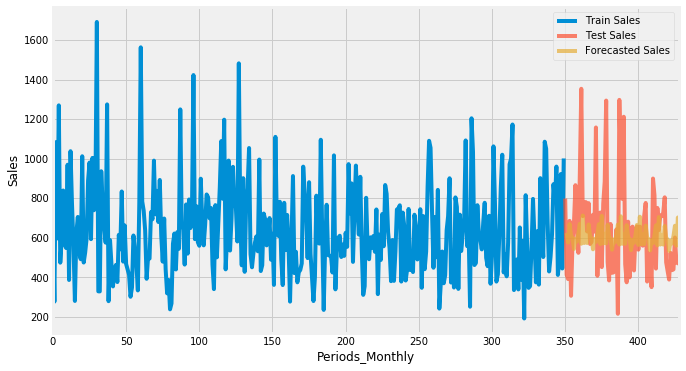

In [120]:
axis = train.plot(label='Train Sales', figsize=(10, 6))
test.plot(ax=axis, label='Test Sales', alpha=0.7)
y_hat.plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Periods_Monthly')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

# We can see that the forcasted sales is capturing the trend of the test data quite well. However the RMSE is quite high and needs improvement. The probable reason for high RMSE is that the training data covers the period of growth and maturity and very little of the decline phase which is why the learning for sharp decline is inadequate. This can be corrected by taking two years of data from the decline phase i.e. include data frpm 2016 and 2017 for training. See below for implementation

# TEST DATA

In [17]:
TEST=pd.read_excel('Test dataset v1.xlsx')

In [18]:
TEST.index = np.arange(429, 429+39)

## Approach 3: Whole Train set plus 2016 & 2017 from test set to train the model on

In [171]:
sales_ts_added2016=sales_ts.append(TEST[(TEST.index>428) & (TEST.index<(428+26))]['EQ'])

In [172]:
sales_ts_added2016.isnull().value_counts()

False    454
Name: EQ, dtype: int64

In [173]:
dftest = adfuller(sales_ts_added2016)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -9.874
DF test p-value is 0.0000


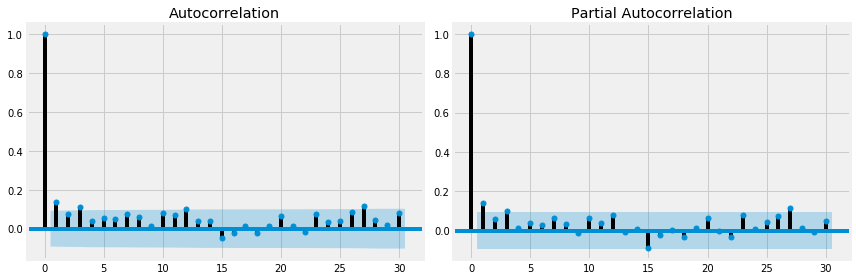

In [174]:
#stattionary as pvalue suggested above and below through acf/pacf

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_added2016, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_added2016, lags=30, ax=axes[1])
plt.tight_layout()

In [109]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_added2016,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}13 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1)x(0, 1, 0, 13)13 model - AIC:270.3686124430967


In [175]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts_added2016,
                                      order=(0, 1, 1),
                                      seasonal_order=(0, 1, 0, 13),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [176]:
y_hat=best_results.predict(start=454, end=467)

In [177]:
y_fitted=best_results.fittedvalues

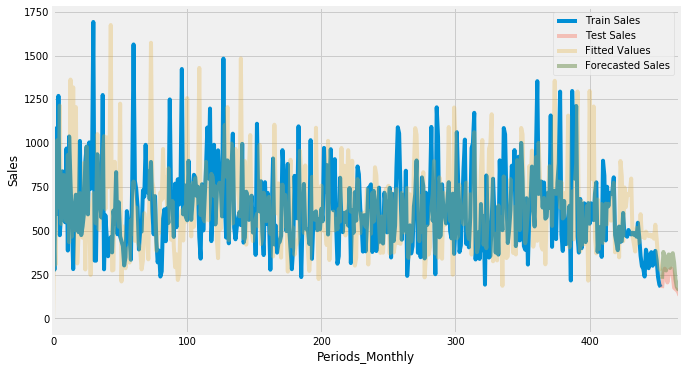

In [180]:
axis = sales_ts_added2016.plot(label='Train Sales', figsize=(10, 6))
TEST[TEST.index>453]['EQ'].plot(ax=axis, label='Test Sales', alpha=0.3)
y_fitted.plot(ax=axis, label='Fitted Values', alpha=0.3)
y_hat.plot(ax=axis, label='Forecasted Sales', alpha=0.5)
axis.set_xlabel('Periods_Monthly')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [119]:
mse = ((TEST[TEST.index>453]['EQ'] - y_hat) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 88.565


In [121]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [123]:
mape=MAPE(TEST[TEST.index>453]['EQ'],y_hat)

print('The Mean Absolute Percent Error (MAPE) of our forecasts is {}'.format(round(mape, 3)))

The Mean Absolute Percent Error (MAPE) of our forecasts is 33.84


## We see a far better result. RMSE has gone down dramatically and the MAPE is much lower. The graph also suggests forecasted values being much closer to the original 2018 actuals.

We would however try another algorithm to see if we can get the MAPE further down

  # Try Holt Winter

In [132]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [181]:
model_fit = ExponentialSmoothing(np.asarray(sales_ts_added2016) ,
                                 seasonal_periods = 13 ,trend='add', seasonal='add').fit()

In [182]:
fitted_values=model_fit.fittedvalues

In [248]:
y_hat = model_fit.forecast(len(TEST[TEST.index>453]['EQ'])+1)

In [250]:
y_hat=pd.Series(y_hat)
y_hat.index=np.arange(453,468)

In [231]:
mse = ((TEST[TEST.index>453]['EQ'] - y_hat) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 70.659


In [232]:
mape=MAPE(TEST[TEST.index>453]['EQ'],y_hat)
print('The Mean Absolute Percent Error (MAPE) of our forecasts is {}'.format(round(mape, 3)))

The Mean Absolute Percent Error (MAPE) of our forecasts is 25.46


In [233]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.0526
Smoothing Slope:  0.0526
Smoothing Seasonal:  0.2105
Initial Level:  649.3671
Initial Slope:  0.0
Initial Seasons:  [  18.4915 -371.6497  434.5378  -52.0479  620.4818 -174.4375  -50.4147
  190.2042  -83.3482 -100.5451  320.3478 -261.9232  388.8627]



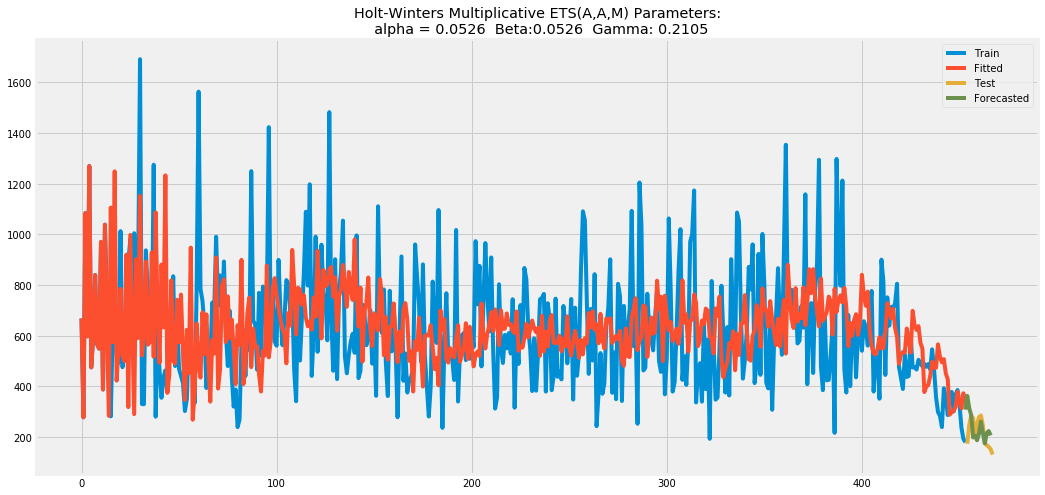

In [234]:
plt.figure(figsize=(16,8))
plt.plot( sales_ts_added2016, label='Train')
plt.plot(fitted_values, label ='Fitted')
plt.plot(TEST[TEST.index>453]['EQ'], label='Test')
plt.plot(y_hat, label='Forecasted')
plt.title('Holt-Winters Multiplicative ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [252]:
pd.DataFrame({'Forecast':y_hat, 'Actuals':TEST[TEST.index>452]['EQ']})

,Forecast,Actuals
453,308.197189,179.292504
454,362.334568,173.237305
455,314.964333,247.315476
456,286.019780,284.183292
457,198.368135,274.430757
458,205.150959,205.499984
459,187.218955,250.555064
460,213.663864,278.317524
461,260.633649,284.895480
462,215.521494,244.931359


This model has reduced the MAPE further down and the comparison of the actuals and forecasted values is shown above for the last year i.e. 2018 in test data. Holt winter's double exponential algorithm could predict the best with fair consideration of trend, seasonality and randomness.